
# Задание к лекции 04-1: Линейная регрессия 1

Name: Вереина Мария

Email: vereina.m@yandex.ru




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [ ]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Text(0, 0.5, 'Значения')

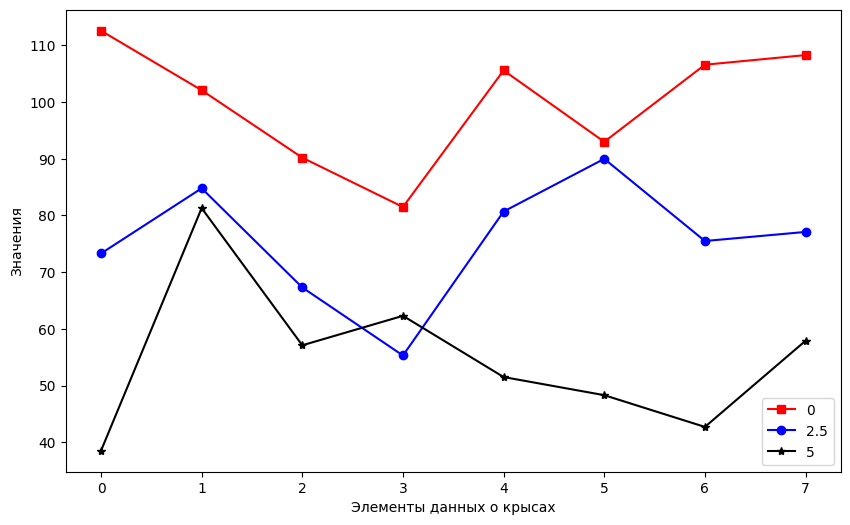

In [ ]:
# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

plt.plot(food_consump_dose0,color='r',marker='s',label='0')
plt.plot(food_consump_dose2p5,color='b',marker='o',label='2.5')
plt.plot(food_consump_dose5,color='k',marker='*',label='5')

plt.legend(loc=4)
plt.xlabel('Элементы данных о крысах')
plt.ylabel('Значения')

**Комментарий**: по данному графику предварительно можно увидеть, что значения потребления пищи при дозе = 5 находятся в самой нижней области.

## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

1) Готовим фрейм данных для построения диаграммы и линейной регресии

In [ ]:
# Создание данных о введенной дозе
df = [0, 2.5, 5]

# Объединение данных
df1 = food_consump_dose0 + food_consump_dose2p5 + food_consump_dose5
df_food = pd.DataFrame.from_dict({'food_dose': df1})
df_food

# Создаем второй столбец и присваиваем значения в зависимости от индекса
df_food['dose'] = 0  # Присваиваем всем значениям начальное значение 0
df_food.loc[8:15, 'dose'] = 2.5  # Присваиваем второй восьмёрке значения 2.5
df_food.loc[16:23, 'dose'] = 5  # Присваиваем третьей восьмёрке значения 5

print(df_food)

    food_dose  dose
0       112.6   0.0
1       102.1   0.0
2        90.2   0.0
3        81.5   0.0
4       105.6   0.0
5        93.0   0.0
6       106.6   0.0
7       108.3   0.0
8        73.3   2.5
9        84.8   2.5
10       67.3   2.5
11       55.3   2.5
12       80.7   2.5
13       90.0   2.5
14       75.5   2.5
15       77.1   2.5
16       38.5   5.0
17       81.3   5.0
18       57.1   5.0
19       62.3   5.0
20       51.5   5.0
21       48.3   5.0
22       42.7   5.0
23       57.9   5.0


In [ ]:
df_food.describe()

,food_dose,dose
count,24.000000,24.000000
mean,76.812500,2.500000
std,21.842685,2.085144
min,38.500000,0.000000
25%,57.700000,0.000000
50%,78.900000,2.500000
75%,90.900000,5.000000
max,112.600000,5.000000


2) Строим диаграмму рассеяния, добавляя линию тренда

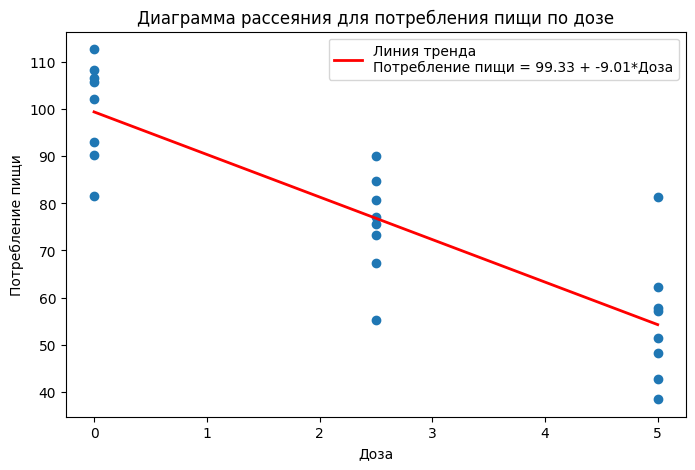

In [ ]:
# Диаграмма рассеяния
plt.figure(figsize=(8, 5))
plt.scatter(df_food['dose'], df_food['food_dose'])
plt.title('Диаграмма рассеяния для потребления пищи по дозе')
plt.xlabel('Доза')
plt.ylabel('Потребление пищи')

# Линейная регрессия
model = sm.ols(formula="food_dose ~ dose", data=df_food).fit()
predictions = model.predict()

# Получение коэффициентов и R-квадрат
beta0, beta1 = model.params
r_2 = model.rsquared

# Добавление линии тренда
plt.plot(df_food['dose'], predictions, color='red', linewidth=2, label=f'Линия тренда\nПотребление пищи = {beta0:.2f} + {beta1:.2f}*Доза')

plt.legend()
plt.show()

3) Запускаем линейную регрессию данных

In [ ]:
rats = sm.ols(formula="food_dose ~ dose", data=df_food).fit()
rats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              food_dose   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           7.27e-08
Time:                        16:11:06   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.000      91.700     106.963
dose          -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ваш ответ:**

Линейное уравнение:

Потребление пищи = 99.33 - 9.01*Доза

Это означает, что увеличение x на одну единицу связано с уменьшением y на 9.01 единицы. В этом случае увеличение дозы на один мг/кг влечет за собой уменьшение потребления пищи на 9.01 г/кг.

Значение R-квадрат: 0.739. 74% изменчивости данных учитывается моделью.
Значение  p  для F-статистики очень мало.
Переменные имеют сильную корреляционную связь.

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



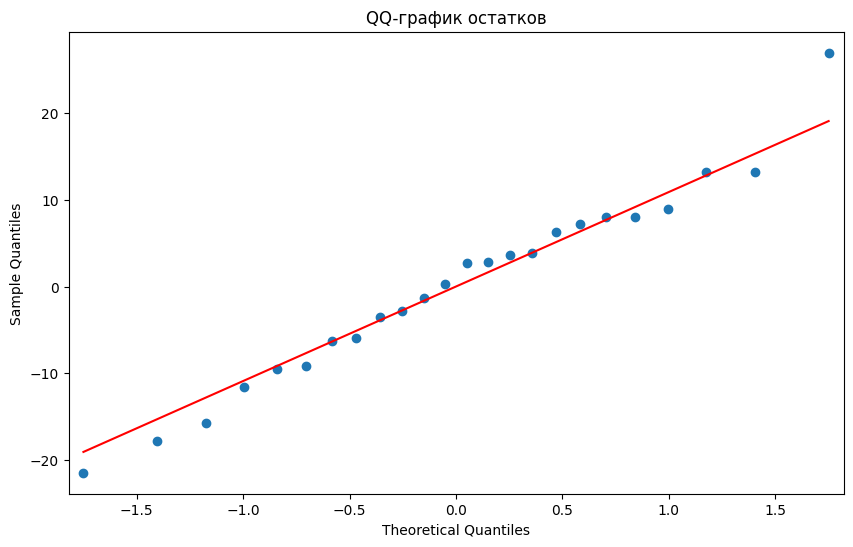

In [ ]:
model_2 = sm.ols(formula="food_dose ~ dose", data=df_food).fit()

import statsmodels.api as sms

# Расчет остатков
residuals = model_2.resid

# Построение QQ-графика остатков
fig = sms.qqplot(residuals, line='s')

plt.title("QQ-график остатков")
plt.show()

**Ваш ответ:** точки на графике выше выглядят так, как будто они лежат примерно на прямой линии, что указывает на линейную зависимость между x и y.
